In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('./data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [18]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [20]:
df = pd.read_csv('./data/wine.csv', header=None)
X = df.iloc[:,0:12]
y = df.iloc[:,12]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 0.8 x 0.25 = 0.2
history = model.fit(x_train, y_train, epochs=50, batch_size=500,validation_split=0.25)

score = model.evaluate(x_test, y_test)
print('Test 정확도', score[1])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 18ms/step - loss: 0.4038 - accuracy: 0.7488 - val_loss: 0.3802 - val_accuracy: 0.7392
Epoch 2/50
8/8 [=

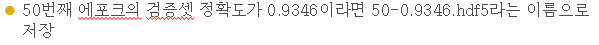

In [21]:
modelpath = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'

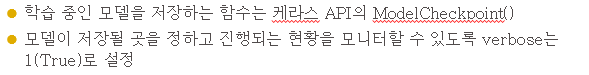

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [24]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=500,validation_split=0.25, verbose=[checkpointer])
score = model.evaluate(x_test, y_test)
print("테스트 정확도:", score[1])

Epoch 1/2000
Epoch 2/2000
Epoch 3/2000
Epoch 4/2000
Epoch 5/2000
Epoch 6/2000
Epoch 7/2000
Epoch 8/2000
Epoch 9/2000
Epoch 10/2000
Epoch 11/2000
Epoch 12/2000
Epoch 13/2000
Epoch 14/2000
Epoch 15/2000
Epoch 16/2000
Epoch 17/2000
Epoch 18/2000
Epoch 19/2000
Epoch 20/2000
Epoch 21/2000
Epoch 22/2000
Epoch 23/2000
Epoch 24/2000
Epoch 25/2000
Epoch 26/2000
Epoch 27/2000
Epoch 28/2000
Epoch 29/2000
Epoch 30/2000
Epoch 31/2000
Epoch 32/2000
Epoch 33/2000
Epoch 34/2000
Epoch 35/2000
Epoch 36/2000
Epoch 37/2000
Epoch 38/2000
Epoch 39/2000
Epoch 40/2000
Epoch 41/2000
Epoch 42/2000
Epoch 43/2000
Epoch 44/2000
Epoch 45/2000
Epoch 46/2000
Epoch 47/2000
Epoch 48/2000
Epoch 49/2000
Epoch 50/2000
Epoch 51/2000
Epoch 52/2000
Epoch 53/2000
Epoch 54/2000
Epoch 55/2000
Epoch 56/2000
Epoch 57/2000
Epoch 58/2000
Epoch 59/2000
Epoch 60/2000
Epoch 61/2000
Epoch 62/2000
Epoch 63/2000
Epoch 64/2000
Epoch 65/2000
Epoch 66/2000
Epoch 67/2000
Epoch 68/2000
Epoch 69/2000
Epoch 70/2000
Epoch 71/2000
Epoch 72/2000
E

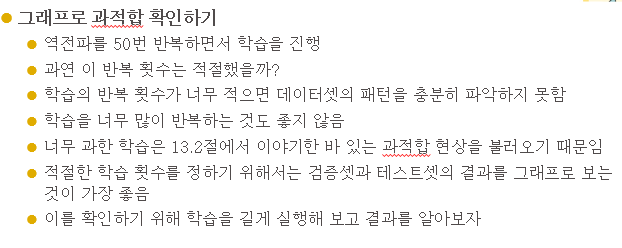

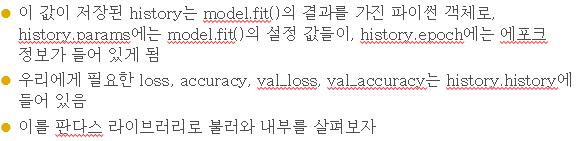

In [25]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.068312,0.980498,0.062319,0.983846
1,0.066762,0.982037,0.056225,0.980000
2,0.065839,0.981781,0.055571,0.979231
3,0.066379,0.981268,0.058804,0.977692
4,0.066981,0.981268,0.056650,0.983077
...,...,...,...,...
1995,0.026973,0.991789,0.041524,0.990769
1996,0.025712,0.991275,0.041625,0.990769
1997,0.028747,0.990249,0.061245,0.982308
1998,0.029704,0.991275,0.045779,0.990769


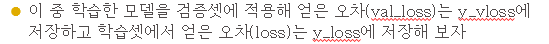

In [26]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

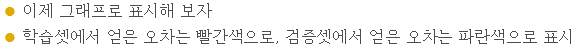

In [30]:
import numpy as np
import matplotlib.pyplot as plt

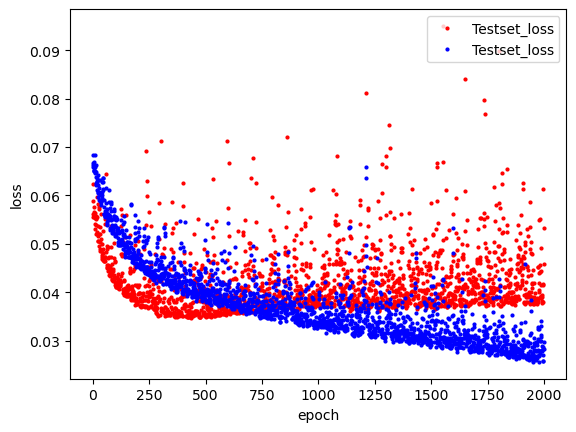

In [31]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c="blue", markersize=2, label='Testset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()